In [1]:
import pandas as pd
import numpy as np

import json
from pandas.io.json import json_normalize
from pprint import pprint

#import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
#import cufflinks as cf
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

from scipy import stats
from scipy.fftpack import fft

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.linear_model import ARDRegression, LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [2]:
import pandas as pd
import numpy as np

## Data cleaning

In [3]:
df = pd.read_csv('..\UseCase_3_Datasets\sales_granular.csv')

In [4]:
df.head()

,store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,...,6/25/17 13:00,6/25/17 14:00,6/25/17 15:00,6/25/17 16:00,6/25/17 17:00,6/25/17 18:00,6/25/17 19:00,6/25/17 20:00,6/25/17 21:00,6/25/17 22:00
0,10055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,60.0,150.0,600.0,NaN,NaN,NaN
4,10085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for index, boolean in enumerate(df.store_code.duplicated()):
    if boolean: print index

33
34
35


In [6]:
# inspect duplicate
df.loc[df.store_code == df.store_code[33]]

,store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,...,6/25/17 13:00,6/25/17 14:00,6/25/17 15:00,6/25/17 16:00,6/25/17 17:00,6/25/17 18:00,6/25/17 19:00,6/25/17 20:00,6/25/17 21:00,6/25/17 22:00
32,11028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
33,11028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
34,11028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN
35,11028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Lines 33, 34 and 35 are identical to line 32
df.drop(df.index[[33, 34, 35]], inplace=True)

In [8]:
df.store_code.is_unique

True

#### DateTime transformation

In [9]:
df.set_index('store_code', inplace=True)

In [10]:
df.columns = pd.to_datetime(df.columns)

In [11]:
df.head()

,2015-08-03 09:00:00,2015-08-03 10:00:00,2015-08-03 11:00:00,2015-08-03 12:00:00,2015-08-03 13:00:00,2015-08-03 14:00:00,2015-08-03 15:00:00,2015-08-03 16:00:00,2015-08-03 17:00:00,2015-08-03 18:00:00,...,2017-06-25 13:00:00,2017-06-25 14:00:00,2017-06-25 15:00:00,2017-06-25 16:00:00,2017-06-25 17:00:00,2017-06-25 18:00:00,2017-06-25 19:00:00,2017-06-25 20:00:00,2017-06-25 21:00:00,2017-06-25 22:00:00
store_code,,,,,,,,,,,,,,,,,,,,,
10055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.0,60.0,150.0,600.0,NaN,NaN,NaN
10085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Clean impossible value

In [12]:
#remove all negative value as t is impossible to have negative value for sales volume
df = df.applymap(lambda x: 0 if x < 0 else x)

In [13]:
# In order to guess how to decide the timeframe that will suit the most the problem,
# we can use the frequency domain to obeserve pick and cycle in sales
# later

## Timeframe resample

In [14]:
df2 = df.T

In [15]:
df3 = df2.resample('D').sum()

In [16]:
df3.shape

(693, 903)

In [17]:
df3.dropna(axis=1, how='all', inplace=True)

In [18]:
df3.shape

(693, 903)

In [19]:
df3.head()

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
2015-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1350.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,450.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1140.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,630.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Creation of a dataset (X and y)

In [20]:
X=[]
y=[]


for index, column in enumerate(df3):
    if index % 50 == 0:
        print index, len(X)
    for stop in np.arange(100, len(df3[column])):
        start = stop - 100
            
        if not (df3[column][start:stop].isnull().values.any() or np.isnan(df3[column][stop])):
            X.append([df3[column][start:stop].values])
            y.append([df3[column][stop]])


0 0
50 1758
100 2262
150 2454
200 2865
250 2928
300 2928
350 2928
400 2928
450 2928
500 3878
550 3878
600 3886
650 3886
700 3886
750 3886
800 3927
850 4298
900 5963


In [21]:
X = np.array(X).squeeze()

In [22]:
y = np.array(y).squeeze()

In [23]:
X[0]

array([ 1530.,  1950.,  2700.,   390.,   630.,   240.,   420.,  1260.,
        1470.,  1950.,  1680.,  1230.,   360.,  1200.,  1020.,  1380.,
         600.,  1050.,  2520.,  1170.,   510.,   420.,   990.,  1560.,
         450.,   750.,  1680.,  1860.,   810.,  2610.,  1740.,  1320.,
        1110.,  1020.,  2310.,  2010.,  1380.,   240.,   810.,  2010.,
        1620.,   450.,   810.,  1920.,  2220.,  1650.,  1410.,   300.,
         900.,  1410.,   690.,  1260.,  1620.,   420.,   450.,  1710.,
        1680.,   840.,  1380.,   780.,   150.,  1530.,  2160.,  1950.,
        2670.,   480.,   900.,  1800.,  1080.,  1890.,  1290.,  1200.,
         900.,  1080.,  1380.,   600.,   960.,   420.,  1230.,   480.,
         990.,   990.,  2220.,   630.,  1950.,   150.,  1620.,  1260.,
        1560.,  1350.,  1710.,  1470.,  1020.,  1710.,  2400.,   660.,
        1980.,  1650.,  1290.,   990.])

#### Draw sales volume for 10 weeks for several POS

In [35]:
# Create traces
trace0 = go.Scatter(
    y = X[0],
    x = np.arange(0, X[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace1 = go.Scatter(
    y = X[2500],
    x = np.arange(0, X[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace2 = go.Scatter(
    y = X[5000],
    x = np.arange(0, X[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

In [36]:
raw_data = [trace0, trace1, trace2]

In [37]:
layout = go.Layout(title='Raw time series', showlegend=True)
fig = go.Figure(data=raw_data, layout=layout)

iplot(fig, filename='show-legend')

#### Remove trend from time series

In [38]:
Xdiff = np.diff(X)

In [39]:
# Plot to vizualized differences
trace0 = go.Scatter(
    y = Xdiff[0],
    x = np.arange(0, Xdiff[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace1 = go.Scatter(
    y = Xdiff[2500],
    x = np.arange(0, Xdiff[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace2 = go.Scatter(
    y = Xdiff[5000],
    x = np.arange(0, Xdiff[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

diff_data = [trace0, trace1, trace2]

layout = go.Layout(title='Time series with trend removed', showlegend=True)
fig = go.Figure(data=diff_data, layout=layout)

iplot(fig, filename='show-legend')

#### Make time series stationary on variance

In [43]:
#Need to change zero value in the data by dummy value (10 ** -10) in order to calculate the base 10 logarithm
X[X == 0] = 10 ** -10
Xlog10 = np.log10(X)

In [46]:
# Plot to vizualized differences
trace0 = go.Scatter(
    y = Xlog10[0],
    x = np.arange(0, Xlog10[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace1 = go.Scatter(
    y = Xlog10[2500],
    x = np.arange(0, Xlog10[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace2 = go.Scatter(
    y = Xlog10[5000],
    x = np.arange(0, Xlog10[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

log10_data = [trace0, trace1, trace2]

layout = go.Layout(title='Stationary on variance time series', showlegend=True)
fig = go.Figure(data=log10_data, layout=layout)

iplot(fig, filename='show-legend')

#### Make time series stationary on mean andvariance

In [47]:
Xnew = np.diff(np.log10(X))

In [48]:
# Plot to vizualized differences
trace0 = go.Scatter(
    y = Xnew[0],
    x = np.arange(0, Xnew[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace1 = go.Scatter(
    y = Xnew[2500],
    x = np.arange(0, Xnew[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace2 = go.Scatter(
    y = Xnew[5000],
    x = np.arange(0, Xnew[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

new_data = [trace0, trace1, trace2]

layout = go.Layout(title='Stationary on variance time series', showlegend=True)
fig = go.Figure(data=new_data, layout=layout)

iplot(fig, filename='show-legend')

## ARIMA model

In [56]:
from statsmodels.tsa.arima_model import ARIMA

def acf(series):
    n = len(series)
    data = np.asarray(series)
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / float(n)

    def r(h):
        acf_lag = ((data[:n - h] - mean) * (data[h:] - mean)).sum() / float(n) / c0
        return round(acf_lag, 3)
    x = np.arange(n) # Avoiding lag 0 calculation
    acf_coeffs = map(r, x)
    return acf_coeffs

In [58]:
Xacf = np.apply_along_axis(acf, 1, np.diff(np.log10(X)))

In [62]:
Xacf.shape

(5963L, 99L)

In [63]:
Xacf[0]

array([ 1.   , -0.403, -0.067, -0.105,  0.086, -0.085,  0.142, -0.064,
        0.007, -0.027,  0.089, -0.185,  0.142,  0.084, -0.151, -0.056,
        0.086,  0.041, -0.018, -0.033,  0.062, -0.037, -0.04 ,  0.096,
       -0.198,  0.194, -0.047, -0.015, -0.011,  0.031,  0.007, -0.125,
        0.144, -0.034, -0.061,  0.101, -0.026, -0.116,  0.188, -0.089,
       -0.034, -0.007,  0.076, -0.118,  0.143, -0.049, -0.049, -0.065,
        0.196, -0.073, -0.04 ,  0.012, -0.046,  0.003,  0.051,  0.066,
       -0.091,  0.069, -0.077, -0.018,  0.043,  0.015, -0.021,  0.013,
       -0.017,  0.062, -0.091,  0.057, -0.035,  0.046, -0.084,  0.085,
       -0.053,  0.042,  0.006, -0.014,  0.01 , -0.045, -0.002, -0.003,
        0.086, -0.075,  0.055, -0.034, -0.004, -0.009,  0.006,  0.014,
       -0.018,  0.014,  0.007, -0.036,  0.041, -0.033,  0.007,  0.007,
        0.005, -0.002, -0.001])

In [60]:
# Plot to vizualized differences
trace0 = go.Scatter(
    y = Xacf[0],
    x = np.arange(0, Xacf[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace1 = go.Scatter(
    y = Xacf[2500],
    x = np.arange(0, Xacf[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

trace2 = go.Scatter(
    y = Xacf[5000],
    x = np.arange(0, Xacf[0].max()),
    mode = 'lines+markers',
    name = 'lines+markers'
)

acf_data = [trace0, trace1, trace2]

layout = go.Layout(title='ACF', showlegend=True)
fig = go.Figure(data=acf_data, layout=layout)

iplot(fig, filename='show-legend')

## Seasonal decomposition

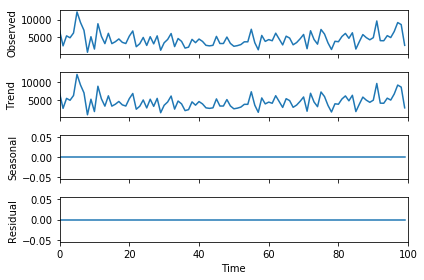

In [453]:
result = seasonal_decompose(X[5000], model='additive', freq=1)
result.plot()
plt.show()

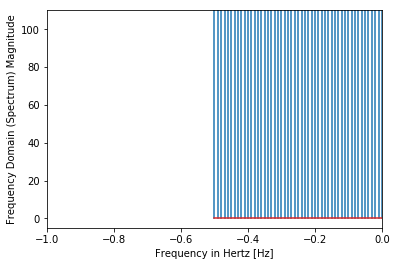

In [454]:
from scipy import fftpack

f_s=1

fX = fftpack.fft(X[0])
freqs = fftpack.fftfreq(len(X[0])) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(fX))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

plt.show()

## Periodical feature

In [455]:
Xangle = np.angle(np.fft.fft2(X))

In [456]:
X.shape

(5963L, 100L)

In [457]:
Xangle.shape

(5963L, 100L)

In [458]:
Xperiodic = np.append(Xangle, X, axis=1)

## Regression models

#### Split dataset into test and train datasets

In [459]:
shuffleX, shuffley = shuffle(Xperiodic, y)

In [460]:
shuffleX[:(len(Xperiodic)/5)].shape

(1192L, 200L)

In [461]:
# Take 1/5 of the dataset to test
testX, testy = shuffleX[:(len(Xperiodic)/5)], shuffley[:(len(Xperiodic)/5)]
trainX, trainy = shuffleX[(len(Xperiodic)/5):], shuffley[(len(Xperiodic)/5):]

#### simple model : linear regression

In [462]:
linear = LinearRegression()
linear.fit(trainX, trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [463]:
y_pred = linear.predict(testX)

In [464]:
MAE = mean_absolute_error(y_pred, testy)
MAE

818.26441282217036

In [465]:
MAE/50

16.365288256443407

In [466]:
testX.mean()

1167.4859912966672

In [467]:
testX

array([[ -2.29909372e+00,   2.38452915e+00,   2.37087181e+00, ...,
          1.05000000e+03,   8.70000000e+02,   2.82000000e+03],
       [ -1.06972320e+00,  -3.04696316e-01,  -1.27275326e+00, ...,
          1.29000000e+03,   3.00000000e+01,   1.50000000e+02],
       [ -5.35432068e-01,   4.85502955e-01,   3.70400979e-01, ...,
          3.51000000e+03,   4.53000000e+03,   3.87000000e+03],
       ..., 
       [  2.03381017e+00,  -5.45276190e-01,  -1.79571631e+00, ...,
          1.14000000e+03,   8.70000000e+02,   4.80000000e+02],
       [  2.74108126e+00,  -8.62061391e-01,  -1.28887486e+00, ...,
          2.70000000e+03,   1.53000000e+03,   1.50000000e+03],
       [ -1.24452435e+00,   2.23708173e+00,   1.05544120e+00, ...,
          1.29000000e+03,   3.18000000e+03,   1.47000000e+03]])

In [468]:
testX.shape

(1192L, 200L)

In [469]:
testy.shape

(1192L,)

In [470]:
testX.T[0].shape

(1192L,)

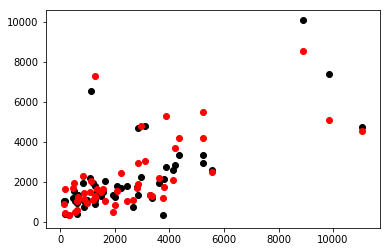

In [471]:
# Plot outputd
plt.scatter(testX.T[-1][:50], testy[:50] , color='black')
plt.scatter(testX.T[-1][:50] , y_pred[:50] , color='red')

plt.show()

#### Polynomial regression

In [472]:
X_transformed.shape

(9669L, 5151L)

In [473]:
Xperiodic.shape

(5963L, 200L)

In [474]:
# transformation of feature into a polynomial world
poly = PolynomialFeatures(degree=2)
X_transformed = poly.fit_transform(Xperiodic)

shuffleX, shuffley = shuffle(X_transformed, y)

# Take 1/5 of the dataset to test
testX, testy = shuffleX[:(len(X_transformed)/5)], shuffley[:(len(X_transformed)/5)]
trainX, trainy = shuffleX[(len(X_transformed)/5):], shuffley[(len(X_transformed)/5):]

linear.fit(trainX, trainy)
y_pred = linear.predict(testX)

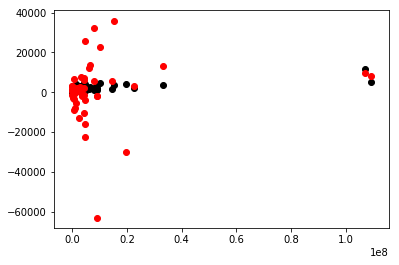

In [475]:
# Plot outputs
plt.scatter(testX.T[-1][:50], testy[:50] , color='black')
plt.scatter(testX.T[-1][:50] , y_pred[:50] , color='red')

plt.show()

In [476]:
MAE = mean_absolute_error(testy, y_pred)
MAE

8588.0931274876675

#### Ridge regression: does the sales volumes are independant ?

In [477]:
ridge = Ridge(alpha=1.0)

shuffleX, shuffley = shuffle(X, y)

# Take 1/5 of the dataset to test
testX, testy = shuffleX[:(len(X)/5)], shuffley[:(len(X)/5)]
trainX, trainy = shuffleX[(len(X)/5):], shuffley[(len(X)/5):]

ridge.fit(trainX, trainy)
y_pred = ridge.predict(testX)

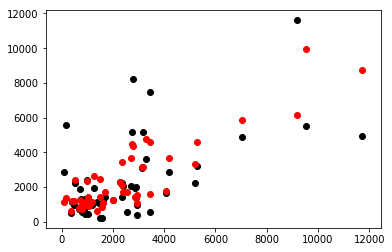

In [478]:
# Plot outputs
plt.scatter(testX.T[-1][:50], testy[:50] , color='black')
plt.scatter(testX.T[-1][:50] , y_pred[:50] , color='red')

plt.show()

In [479]:
MAE = mean_absolute_error(testy, y_pred)
MAE

909.91548253314011

#### Lasso regression: feature selection -> maybe only last sales volume is usefull for prediction

In [480]:
lasso = Lasso(alpha=0.1, max_iter=10000)

lasso.fit(trainX, trainy)
y_pred = lasso.predict(testX)

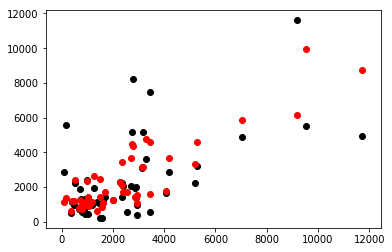

In [481]:
# Plot outputs
plt.scatter(testX.T[-1][:50], testy[:50] , color='black')
plt.scatter(testX.T[-1][:50] , y_pred[:50] , color='red')

plt.show()

In [482]:
MAE = mean_absolute_error(testy, y_pred)
MAE

909.91537239920342

#### Elastic Net regression

In [483]:
elastic = ElasticNet(random_state=0)
elastic.fit(trainX, trainy)
y_pred = elastic.predict(testX)

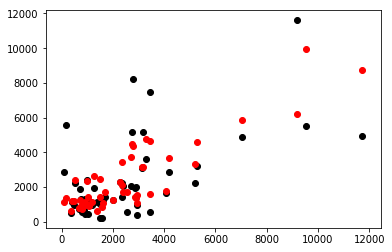

In [484]:
# Plot outputs
plt.scatter(testX.T[-1][:50], testy[:50] , color='black')
plt.scatter(testX.T[-1][:50] , y_pred[:50] , color='red')

plt.show()

In [485]:
MAE = mean_absolute_error(testy, y_pred)
MAE

910.05003772846317

#### a NN 

In [486]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

regr.fit(trainX, trainy)
y_pred = regr.predict(testX)

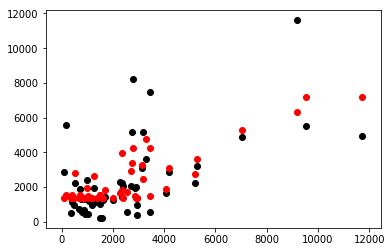

In [487]:
# Plot outputs
plt.scatter(testX.T[-1][:50], testy[:50] , color='black')
plt.scatter(testX.T[-1][:50] , y_pred[:50] , color='red')

plt.show()

In [488]:
MAE = mean_absolute_error(testy, y_pred)
MAE

1014.6744168116278

In [489]:
serie = df2[84146]

In [490]:
len(serie[:-1])

11935

In [491]:
serie[-2:-1]

2017-06-25 21:00:00    30.0
Name: 84146, dtype: float64

In [492]:
X = serie[:-1] 

In [493]:
y = serie[-2: 1]

In [494]:
X.shape

(11935L,)

In [495]:
ols = LinearRegression()
scores = cross_val_score(ols, X, y, cv=5)

ValueError: Found input variables with inconsistent numbers of samples: [11935, 0]

In [ ]:
X = np.asarray(df.columns.weekofyear.tolist()).reshape(-1, 1)

In [ ]:
len(X)

In [ ]:
y = df.T

In [ ]:
ols = LinearRegression()
scores = cross_val_score(ols, X, y, cv=5)

In [ ]:
scores

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
#clf = ARDRegression(compute_score=True)
#clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

In [ ]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(ols, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
df1 = df[:7]

In [ ]:
df1.index

In [ ]:
df1.iloc[0].values

In [ ]:
# Create traces
trace0 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[0].values,
    mode = 'lines',
    name = 'lines'
)

trace1 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[1].values,
    mode = 'lines',
    name = 'lines'
)

trace2 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[2].values,
    mode = 'lines',
    name = 'lines'
)

trace3 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[3].values,
    mode = 'lines',
    name = 'lines'
)

trace4 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[4].values,
    mode = 'lines',
    name = 'lines'
)

trace5 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[5].values,
    mode = 'lines',
    name = 'lines'
)

trace6 = go.Scatter(
    x = df1.columns,
    y = df1.iloc[6].values,
    mode = 'lines',
    name = 'lines'
)

In [ ]:
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print __version__ # requires version >= 1.9.0

In [ ]:
from plotly.graph_objs import Scatter, Figure, Layout

plot([Scatter(x=[1, 2, 3], y=[3, 1, 6])])

In [ ]:
init_notebook_mode(connected=True)

In [ ]:
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])

In [ ]:
json = pd.read_json('UseCase_3_Datasets\Surroundings.json')